# 可视化

## 生成Cityscapes数据集的GT框

In [95]:
import os
from pycocotools.coco import COCO

In [105]:
from yolox.data import COCOFormatDataset, ValTransform
data_dir = "datasets/Cityscapes"
val_ann = "cocoAnnotations/cityscapes_val_caronly_cocostyle.json"
test_size = (640, 640)
valdataset = COCOFormatDataset(
    data_dir=data_dir,
    name="leftImg8bit_val",
    json_file=val_ann,
    img_dir="leftImg8bit/val",
    img_size=test_size,
    preproc=ValTransform(legacy=False),
)

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


In [106]:
valdataset.annotations

[(array([[175.3125, 121.875 , 200.625 , 135.3125,   0.    ]]),
  (1024, 2048),
  (320, 640),
  'munster/munster_000143_000019_leftImg8bit.png'),
 (array([[290.3125, 135.9375, 303.125 , 147.5   ,   0.    ],
         [288.75  , 135.9375, 292.1875, 142.8125,   0.    ],
         [572.1875, 126.5625, 628.75  , 139.6875,   0.    ],
         [321.25  , 126.875 , 368.75  , 169.0625,   0.    ]]),
  (1024, 2048),
  (320, 640),
  'munster/munster_000114_000019_leftImg8bit.png'),
 (array([[227.5   , 126.5625, 247.1875, 132.8125,   0.    ],
         [205.625 , 122.1875, 237.8125, 134.0625,   0.    ],
         [205.9375, 129.375 , 226.25  , 135.3125,   0.    ],
         [269.0625, 130.3125, 291.5625, 136.5625,   0.    ],
         [280.9375, 131.875 , 325.    , 149.6875,   0.    ],
         [267.5   , 132.1875, 284.6875, 158.4375,   0.    ],
         [247.1875, 124.375 , 274.6875, 162.8125,   0.    ],
         [225.    , 132.8125, 262.8125, 166.875 ,   0.    ],
         [229.0625, 135.9375, 256.875 ,

In [107]:
def get_info_from_filepath(path):
    for i,anno in enumerate(valdataset.annotations):
        bboxs,img_size,resize_size,file_path = anno
        if file_path == path:
            return anno
    print('anno not found!')
    return None
anno = get_info_from_filepath('munster/munster_000000_000019_leftImg8bit.png')

In [108]:
import cv2
raw_img = cv2.imread(os.path.join(data_dir,'leftImg8bit/val','munster/munster_000000_000019_leftImg8bit.png'))

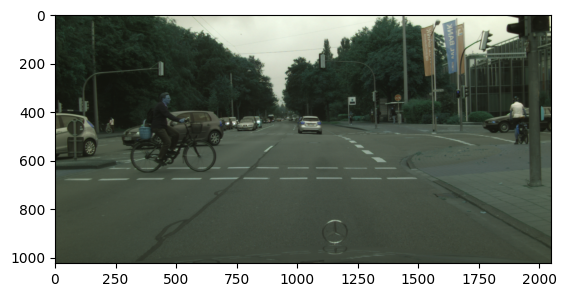

In [109]:
from matplotlib import pyplot as plt
plt.imshow(raw_img)

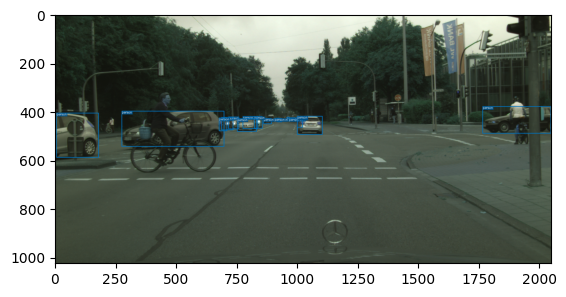

In [110]:
from visualize import vis_GT
from yolox.data.datasets import Cityscapes_CLASSES,KITTI_CLASSES
img = raw_img
img = vis_GT(img, anno[0], max(anno[1])/640, class_names=Cityscapes_CLASSES)
plt.imshow(img)
plt.imsave("save.png",img)

In [111]:
output_path = 'yolox_da_outputs/GT_outputs'
plt.imsave(os.path.join(output_path,"save.png"),img)

### 生成foggy_cityscapesGT 框

In [23]:
raw_img_path = 'datasets/Cityscapes/leftImg8bit_foggy/val/munster'
output_path = 'yolox_da_outputs/GT_outputs'
for file in os.listdir(raw_img_path):
    foggy_type = file[-6:-4]
    if foggy_type=='02':
        print(file)
        anno = get_info_from_filepath('munster/'+file)
        if anno == None:
            print(file+' has not anno!')
        else:
            resize_ratio = max(anno[1])/640
            raw_img = cv2.imread(os.path.join(data_dir,'leftImg8bit_foggy/val/munster/',file))
            img = vis_GT(raw_img, anno[0], resize_ratio, class_names=Cityscapes_CLASSES)
            # plt.imshow(img)
            cv2.imwrite(os.path.join(output_path,'munster_foggy',file),img)
            # plt.imsave(os.path.join(output_path,'munster',file),img)
            

munster_000136_000019_leftImg8bit_foggy_beta_0.02.png
munster_000106_000019_leftImg8bit_foggy_beta_0.02.png
munster_000042_000019_leftImg8bit_foggy_beta_0.02.png
munster_000089_000019_leftImg8bit_foggy_beta_0.02.png
munster_000151_000019_leftImg8bit_foggy_beta_0.02.png
munster_000026_000019_leftImg8bit_foggy_beta_0.02.png
munster_000137_000019_leftImg8bit_foggy_beta_0.02.png
munster_000092_000019_leftImg8bit_foggy_beta_0.02.png
munster_000006_000019_leftImg8bit_foggy_beta_0.02.png
munster_000024_000019_leftImg8bit_foggy_beta_0.02.png
munster_000040_000019_leftImg8bit_foggy_beta_0.02.png
munster_000044_000019_leftImg8bit_foggy_beta_0.02.png
munster_000101_000019_leftImg8bit_foggy_beta_0.02.png
munster_000017_000019_leftImg8bit_foggy_beta_0.02.png
munster_000071_000019_leftImg8bit_foggy_beta_0.02.png
munster_000083_000019_leftImg8bit_foggy_beta_0.02.png
munster_000080_000019_leftImg8bit_foggy_beta_0.02.png
munster_000116_000019_leftImg8bit_foggy_beta_0.02.png
munster_000141_000019_leftIm

### 生成cityscapes GT框


In [114]:
raw_img_path = 'datasets/Cityscapes/leftImg8bit/val/munster'
output_path = 'yolox_da_outputs/GT_outputs'
for file in os.listdir(raw_img_path):
    print(file[0:-4])
    anno = get_info_from_filepath('munster/'+file[0:-4]+".png")
    if anno == None:
        print(file+' has not anno!')
    else:
        resize_ratio = max(anno[1])/640
        raw_img = cv2.imread(os.path.join(data_dir,'leftImg8bit/val/munster/',file))
        img = vis_GT(raw_img, anno[0], resize_ratio, class_names=KITTI_CLASSES)
        # plt.imshow(img)
        cv2.imwrite(os.path.join(output_path,'munster_clear',file),img)
        # plt.imsave(os.path.join(output_path,'munster_clear',file),img) #RGB BGR

munster_000066_000019_leftImg8bit
munster_000071_000019_leftImg8bit
munster_000137_000019_leftImg8bit
munster_000155_000019_leftImg8bit
munster_000088_000019_leftImg8bit
munster_000057_000019_leftImg8bit
munster_000040_000019_leftImg8bit
munster_000159_000019_leftImg8bit
munster_000028_000019_leftImg8bit
munster_000132_000019_leftImg8bit
munster_000064_000019_leftImg8bit
munster_000123_000019_leftImg8bit
munster_000102_000019_leftImg8bit
munster_000127_000019_leftImg8bit
munster_000085_000019_leftImg8bit
munster_000153_000019_leftImg8bit
munster_000129_000019_leftImg8bit
munster_000006_000019_leftImg8bit
munster_000098_000019_leftImg8bit
munster_000015_000019_leftImg8bit
munster_000108_000019_leftImg8bit
munster_000025_000019_leftImg8bit
munster_000002_000019_leftImg8bit
munster_000012_000019_leftImg8bit
munster_000073_000019_leftImg8bit
munster_000149_000019_leftImg8bit
munster_000158_000019_leftImg8bit
munster_000029_000019_leftImg8bit
munster_000032_000019_leftImg8bit
munster_000076

In [88]:
raw_img_path = 'datasets/Cityscapes/leftImg8bit/val/munster'
output_path = 'yolox_da_outputs/GT_outputs'
for file in os.listdir(raw_img_path):
    print(file[0:-4])
    anno = get_info_from_filepath('munster/'+file[0:-4]+"_foggy_beta_0.02.png")
    if anno == None:
        print(file+' has not anno!')
    else:
        resize_ratio = max(anno[1])/640
        raw_img = cv2.imread(os.path.join(data_dir,'leftImg8bit/val/munster/',file))
        img = vis_GT(raw_img, anno[0], resize_ratio, class_names=Cityscapes_CLASSES)
        # plt.imshow(img)
        cv2.imwrite(os.path.join(output_path,'munster_clear',file),img)
        # plt.imsave(os.path.join(output_path,'munster_clear',file),img) #RGB BGR

munster_000066_000019_leftImg8bit
munster_000071_000019_leftImg8bit
munster_000137_000019_leftImg8bit
munster_000155_000019_leftImg8bit
munster_000088_000019_leftImg8bit
munster_000057_000019_leftImg8bit
munster_000040_000019_leftImg8bit
munster_000159_000019_leftImg8bit
munster_000028_000019_leftImg8bit
munster_000132_000019_leftImg8bit
munster_000064_000019_leftImg8bit
munster_000123_000019_leftImg8bit
munster_000102_000019_leftImg8bit
munster_000127_000019_leftImg8bit
munster_000085_000019_leftImg8bit
munster_000153_000019_leftImg8bit
munster_000129_000019_leftImg8bit
munster_000006_000019_leftImg8bit
munster_000098_000019_leftImg8bit
munster_000015_000019_leftImg8bit
munster_000108_000019_leftImg8bit
munster_000025_000019_leftImg8bit
munster_000002_000019_leftImg8bit
munster_000012_000019_leftImg8bit
munster_000073_000019_leftImg8bit
munster_000149_000019_leftImg8bit
munster_000158_000019_leftImg8bit
munster_000029_000019_leftImg8bit
munster_000032_000019_leftImg8bit
munster_000076

## 生成Sim10k数据集的GT框

In [4]:
import os
import xml.etree.ElementTree as ET
from collections import Counter

def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    objects = []

    for obj in root.findall('object'):
        name = obj.find('name').text
        objects.append(name)

    return objects

def find_objects_in_xml_files(directory):
    # 支持的文件扩展名
    supported_extensions = ('.xml', '.XML')
    all_objects = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(supported_extensions):
                file_path = os.path.join(root, file)
                objects = parse_xml(file_path)
                all_objects.extend(objects)

    return all_objects

def main():
    directory = '/home/sipl/gitspace/yolox_implementation/yolox_damain_adaptation/datasets/Sim10k/Annotations'  # 你的文件夹路径
    all_objects = find_objects_in_xml_files(directory)

    # 计数每个对象出现的次数
    object_counts = Counter(all_objects)

    # 打印每个对象及其计数
    for obj, count in object_counts.items():
        print(f"Object: {obj}, Count: {count}")

if __name__ == '__main__':
    main()


Object: car, Count: 57776
Object: motorbike, Count: 921
Object: person, Count: 4


### voc转coco标注

In [20]:
import os
import json
import xml.etree.ElementTree as ET

# 定义COCO数据结构
coco_output = {
    "images": [],
    "categories": [],
    "annotations": []
}

# 类别信息，这里只添加了'car'，可以根据实际情况添加更多类别
category_id = 1
coco_output["categories"].append({
    "id": category_id,
    "name": "car"
})

# 遍历Annotations文件夹中的所有XML文件
annotations_dir = 'datasets/Sim10k/Annotations'
for filename in os.listdir(annotations_dir):
    if filename.endswith('.xml'):
        # 解析XML文件
        tree = ET.parse(os.path.join(annotations_dir, filename))
        root = tree.getroot()
        # 获取图片信息
        file_id = int(filename.split('.')[0])
        file_name = filename[:-4] + '.jpg'
        # print(file_name)
        width = int(root.find('size').find('width').text)
        height = int(root.find('size').find('height').text)

        # 添加图片信息到COCO数据结构
        coco_output["images"].append({
            "id": file_id,
            "width": width,
            "height": height,
            "file_name": file_name
        })

        # 遍历所有对象
        for obj in root.iter('object'):
            # 获取对象信息
            class_name = obj.find('name').text
            if class_name not in ['car']:  # 只处理'car'类别
                continue
            truncated = int(obj.find('truncated').text)
            pose = obj.find('pose').text
            difficult = int(obj.find('difficult').text)

            bndbox = obj.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)

            # 计算面积
            bbox_width = xmax - xmin
            bbox_height = ymax - ymin
            area = bbox_width * bbox_height

            # 添加标注信息到COCO数据结构
            coco_output["annotations"].append({
                "id": len(coco_output["annotations"]) + 1,
                "image_id": file_id,
                "category_id": category_id,
                "segmentation": [],
                "area": area,
                "bbox": [xmin, ymin, bbox_width, bbox_height],
                "iscrowd": 0
            })
        print(filename,"is ok")

# 将COCO数据结构转换为JSON格式并保存到文件
with open('datasets/Sim10k/annotations_coco/sim10k_coco.json', 'w') as output_file:
    json.dump(coco_output, output_file)

print("COCO annotation file has been created.")

3389276.xml is ok
3389423.xml is ok
3386290.xml is ok
3386263.xml is ok
3390172.xml is ok
3385630.xml is ok
3389875.xml is ok
3396687.xml is ok
3400049.xml is ok
3386119.xml is ok
3385068.xml is ok
3386859.xml is ok
3397426.xml is ok
3399570.xml is ok
3396226.xml is ok
3384929.xml is ok
3386330.xml is ok
3400038.xml is ok
3388310.xml is ok
3387704.xml is ok
3390889.xml is ok
3388494.xml is ok
3398952.xml is ok
3401414.xml is ok
3387819.xml is ok
3402013.xml is ok
3395536.xml is ok
3396633.xml is ok
3385164.xml is ok
3389354.xml is ok
3386571.xml is ok
3397380.xml is ok
3400174.xml is ok
3386187.xml is ok
3398250.xml is ok
3386332.xml is ok
3401569.xml is ok
3388895.xml is ok
3389624.xml is ok
3386959.xml is ok
3396860.xml is ok
3397229.xml is ok
3401396.xml is ok
3389999.xml is ok
3399624.xml is ok
3395756.xml is ok
3395968.xml is ok
3398721.xml is ok
3388420.xml is ok
3386144.xml is ok
3386328.xml is ok
3389670.xml is ok
3389028.xml is ok
3389374.xml is ok
3396299.xml is ok
3400500.xm

In [21]:
import os
from pycocotools.coco import COCO

from yolox.data import COCOFormatDataset, ValTransform
data_dir = "datasets/Sim10k"
val_ann = "annotations_coco/sim10k_coco.json"
test_size = (640, 640)
valdataset = COCOFormatDataset(
    data_dir=data_dir,
    name="sim10k",
    json_file=val_ann,
    img_dir="JPEGImages",
    img_size=test_size,
    preproc=ValTransform(legacy=False),
)
valdataset.annotations

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


[(array([[5.86499478e+02, 1.37429467e+02, 6.40000000e+02, 1.53814002e+02,
          0.00000000e+00],
         [3.70825496e+02, 1.26060606e+02, 4.83510972e+02, 1.67857889e+02,
          0.00000000e+00],
         [3.08631139e+02, 1.38432602e+02, 3.22340648e+02, 1.47460815e+02,
          0.00000000e+00],
         [2.97596656e+02, 1.39101358e+02, 3.11640543e+02, 1.47795193e+02,
          0.00000000e+00],
         [5.39352142e+02, 1.32079415e+02, 6.05893417e+02, 1.51473354e+02,
          0.00000000e+00],
         [3.40397074e+02, 1.43113898e+02, 3.51431557e+02, 1.47460815e+02,
          0.00000000e+00],
         [3.34378265e-01, 1.27732497e+02, 9.12852665e+01, 1.82236155e+02,
          0.00000000e+00],
         [6.45350052e+01, 1.28735632e+02, 1.60167189e+02, 1.59498433e+02,
          0.00000000e+00]]),
  (1052, 1914),
  (351, 640),
  '3389276.jpg'),
 (array([[3.70156740e+02, 1.52810867e+02, 3.94566353e+02, 1.69529781e+02,
          0.00000000e+00],
         [4.05935214e+02, 1.43782654e+02,

In [31]:
def get_info_from_filepath(path):
    for i,anno in enumerate(valdataset.annotations):
        bboxs,img_size,resize_size,file_path = anno
        # print(file_path)
        if file_path == path:
            return anno
    print('anno not found!')
    return None
anno = get_info_from_filepath('3399597.jpg')

In [32]:
import cv2
raw_img = cv2.imread(os.path.join(data_dir,'JPEGImages','3399597.jpg'))

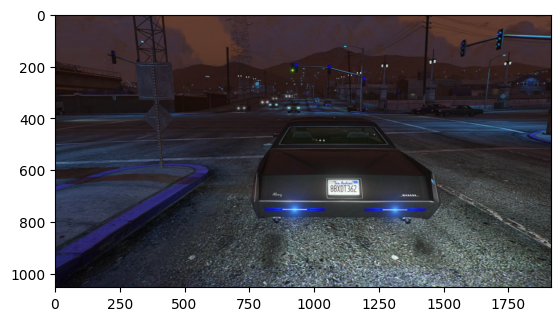

In [33]:
from matplotlib import pyplot as plt
plt.imshow(raw_img)

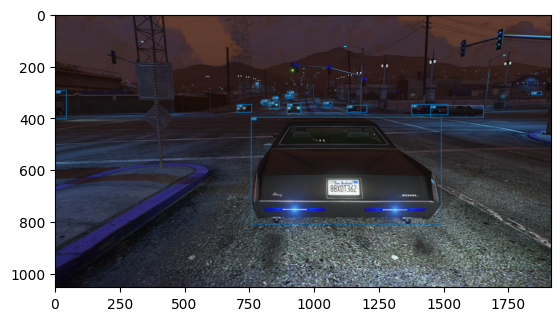

In [34]:
from visualize import vis_GT
from yolox.data.datasets import KITTI_CLASSES
img = raw_img
img = vis_GT(img, anno[0], max(anno[1])/640, class_names=KITTI_CLASSES)
plt.imshow(img)
plt.imsave("save.png",img)

### 生成GT图片

In [39]:
raw_img_path = 'datasets/Sim10k/JPEGImages'
output_path = 'yolox_da_outputs/GT_outputs'
for file in os.listdir(raw_img_path):
        print(file)
        anno = get_info_from_filepath(file)
        if anno == None:
            print(file+' has not anno!')
        else:
            resize_ratio = max(anno[1])/640
            raw_img = cv2.imread(os.path.join(data_dir,'JPEGImages/',file))
            img = vis_GT(raw_img, anno[0], resize_ratio, class_names=KITTI_CLASSES)
            # plt.imshow(img)
            cv2.imwrite(os.path.join(output_path,'sim10k',file),img)
            # plt.imsave(os.path.join(output_path,'munster',file),img)
            

3399597.jpg
3400381.jpg
3389360.jpg
3387039.jpg
3397263.jpg
3400106.jpg
3388578.jpg
3385924.jpg
3387413.jpg
3399954.jpg
3401227.jpg
3399972.jpg
3388407.jpg
3401100.jpg
3399201.jpg
3397047.jpg
3388296.jpg
3397657.jpg
3389674.jpg
3398269.jpg
3396175.jpg
3388388.jpg
3395598.jpg
3385114.jpg
3387352.jpg
3397529.jpg
3397676.jpg
3396937.jpg
3395840.jpg
3391335.jpg
3397630.jpg
3400853.jpg
3384810.jpg
3396237.jpg
3399922.jpg
3388557.jpg
3388698.jpg
3401296.jpg
3398267.jpg
3396996.jpg
3384757.jpg
3399730.jpg
3388990.jpg
3397212.jpg
3387069.jpg
3388652.jpg
3398627.jpg
3389573.jpg
3399490.jpg
3401422.jpg
3398069.jpg
3389848.jpg
3395463.jpg
3388307.jpg
3401601.jpg
3388043.jpg
3389220.jpg
3384911.jpg
3396505.jpg
3396105.jpg
3386343.jpg
3399170.jpg
3387948.jpg
3387727.jpg
3384784.jpg
3396959.jpg
3395596.jpg
3390062.jpg
3398380.jpg
3387896.jpg
3395764.jpg
3396539.jpg
3386857.jpg
3395436.jpg
3389680.jpg
3389409.jpg
3400439.jpg
3396093.jpg
3386151.jpg
3388972.jpg
3387446.jpg
3386297.jpg
3387905.jpg
3388

## 生成KITTI数据集的GT框

### voc转coco标注

In [48]:
import os
import json
import xml.etree.ElementTree as ET

# 定义COCO数据结构
coco_output = {
    "images": [],
    "categories": [],
    "annotations": []
}

# 类别信息，这里只添加了'car'，可以根据实际情况添加更多类别
category_id = 1
coco_output["categories"].append({
    "id": category_id,
    "name": "car"
})

# 遍历Annotations文件夹中的所有XML文件
annotations_dir = 'datasets/KITTI/Annotations'
for filename in os.listdir(annotations_dir):
    if filename.endswith('.xml'):
        # 解析XML文件
        tree = ET.parse(os.path.join(annotations_dir, filename))
        root = tree.getroot()
        # 获取图片信息
        file_id = int(filename.split('.')[0])
        file_name = filename[:-4] + '.png'
        # print(file_name)
        width = int(root.find('size').find('width').text)
        height = int(root.find('size').find('height').text)

        # 添加图片信息到COCO数据结构
        coco_output["images"].append({
            "id": file_id,
            "width": width,
            "height": height,
            "file_name": file_name
        })

        # 遍历所有对象
        for obj in root.iter('object'):
            # 获取对象信息
            class_name = obj.find('name').text
            if class_name not in ['car']:  # 只处理'car'类别
                continue
            truncated = int(obj.find('truncated').text)
            pose = obj.find('pose').text
            difficult = int(obj.find('difficult').text)

            bndbox = obj.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)

            # 计算面积
            bbox_width = xmax - xmin
            bbox_height = ymax - ymin
            area = bbox_width * bbox_height

            # 添加标注信息到COCO数据结构
            coco_output["annotations"].append({
                "id": len(coco_output["annotations"]) + 1,
                "image_id": file_id,
                "category_id": category_id,
                "segmentation": [],
                "area": area,
                "bbox": [xmin, ymin, bbox_width, bbox_height],
                "iscrowd": 0
            })
        print(filename,"is ok")

# 将COCO数据结构转换为JSON格式并保存到文件
with open('datasets/KITTI/annotations_coco/KITTI_coco.json', 'w') as output_file:
    json.dump(coco_output, output_file)

print("COCO annotation file has been created.")

Exception ignored in: <function COCOFormatDataset.__del__ at 0x7f66eaf1a1f0>
Traceback (most recent call last):
  File "/home/sipl/gitspace/yolox_implementation/yolox_damain_adaptation/yolox/data/datasets/coco_format.py", line 84, in __del__
    del self.imgs
AttributeError: imgs


001722.xml is ok
001774.xml is ok
001537.xml is ok
003345.xml is ok
002510.xml is ok
000188.xml is ok
005997.xml is ok
004805.xml is ok
000968.xml is ok
006025.xml is ok
003201.xml is ok
001119.xml is ok
000444.xml is ok
006128.xml is ok
005104.xml is ok
005171.xml is ok
006747.xml is ok
005936.xml is ok
003968.xml is ok
003387.xml is ok
005275.xml is ok
004763.xml is ok
004551.xml is ok
006555.xml is ok
004145.xml is ok
000375.xml is ok
004978.xml is ok
003398.xml is ok
005560.xml is ok
003404.xml is ok
001955.xml is ok
004075.xml is ok
005238.xml is ok
001097.xml is ok
003872.xml is ok
004380.xml is ok
000674.xml is ok
000621.xml is ok
003482.xml is ok
004566.xml is ok
003428.xml is ok
003216.xml is ok
002338.xml is ok
004019.xml is ok
005556.xml is ok
006572.xml is ok
006509.xml is ok
006209.xml is ok
000111.xml is ok
006522.xml is ok
003179.xml is ok
005302.xml is ok
002052.xml is ok
002704.xml is ok
004367.xml is ok
003433.xml is ok
006761.xml is ok
006937.xml is ok
005045.xml is 

In [49]:
import os
from pycocotools.coco import COCO

from yolox.data import COCOFormatDataset, ValTransform
data_dir = "datasets/KITTI"
val_ann = "annotations_coco/KITTI_coco.json"
test_size = (640, 640)
valdataset = COCOFormatDataset(
    data_dir=data_dir,
    name="KITTI",
    json_file=val_ann,
    img_dir="JPEGImages",
    img_size=test_size,
    preproc=ValTransform(legacy=False),
)

valdataset.annotations

loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


[(array([[215.39452496,  92.75362319, 280.8373591 , 116.45732689,
            0.        ],
         [312.78582931,  90.69243156, 375.13687601, 110.78904992,
            0.        ],
         [255.07246377,  88.63123994, 335.4589372 , 120.57971014,
            0.        ]]),
  (375, 1242),
  (193, 640),
  '001722.png'),
 (array([[  0.51529791, 100.99838969,  37.10144928, 133.97745572,
            0.        ],
         [219.00161031,  94.29951691, 237.55233494, 104.09017713,
            0.        ]]),
  (375, 1242),
  (193, 640),
  '001774.png'),
 (array([[276.19967794,  90.69243156, 288.05152979, 100.99838969,
            0.        ],
         [  0.51529791, 102.54428341,  42.76972625, 131.91626409,
            0.        ],
         [ 78.84057971, 100.48309179, 113.88083736, 113.88083736,
            0.        ]]),
  (375, 1242),
  (193, 640),
  '001537.png'),
 (array([[328.76006441,  92.23832528, 346.28019324, 106.15136876,
            0.        ],
         [347.31078905,  91.72302738,

In [51]:
def get_info_from_filepath(path):
    for i,anno in enumerate(valdataset.annotations):
        bboxs,img_size,resize_size,file_path = anno
        # print(file_path)
        if file_path == path:
            return anno
    print('anno not found!')
    return None
anno = get_info_from_filepath('000006.png')


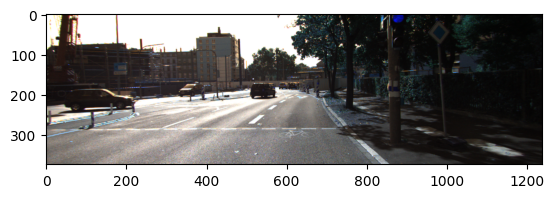

In [54]:
import cv2
raw_img = cv2.imread(os.path.join(data_dir,'JPEGImages','000006.png'))

from matplotlib import pyplot as plt
plt.imshow(raw_img)


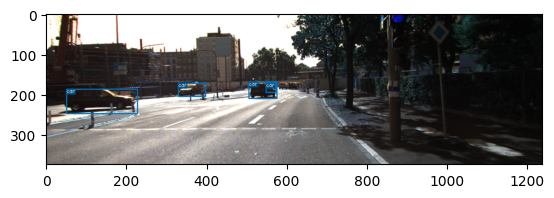

In [55]:
from visualize import vis_GT
from yolox.data.datasets import KITTI_CLASSES
img = raw_img
img = vis_GT(img, anno[0], max(anno[1])/640, class_names=KITTI_CLASSES)
plt.imshow(img)
plt.imsave("save.png",img)

### 生成GT图片

In [57]:
raw_img_path = 'datasets/KITTI/JPEGImages'
output_path = 'yolox_da_outputs/GT_outputs'
for file in os.listdir(raw_img_path):
        print(file)
        anno = get_info_from_filepath(file)
        if anno == None:
            print(file+' has not anno!')
        else:
            resize_ratio = max(anno[1])/640
            raw_img = cv2.imread(os.path.join(data_dir,'JPEGImages/',file))
            img = vis_GT(raw_img, anno[0], resize_ratio, class_names=KITTI_CLASSES)
            # plt.imshow(img)
            cv2.imwrite(os.path.join(output_path,'KITTI',file),img)
            # plt.imsave(os.path.join(output_path,'munster',file),img)
            

000742.png
007443.png
006605.png
anno not found!
006605.png has not anno!
005997.png
003137.png
007106.png
005770.png
003690.png
005376.png
002862.png
006152.png
anno not found!
006152.png has not anno!
002879.png
006935.png
anno not found!
006935.png has not anno!
002064.png
002737.png
006803.png
005076.png
002897.png
001528.png
003196.png
005902.png
002486.png
007456.png
004471.png
003175.png
003446.png
002456.png
anno not found!
002456.png has not anno!
000173.png
006844.png
003291.png
006278.png
003102.png
000843.png
006916.png
002223.png
001847.png
001816.png
004892.png
006351.png
006391.png
006553.png
006592.png
004614.png
004117.png
007087.png
002416.png
002686.png
006253.png
003649.png
anno not found!
003649.png has not anno!
002619.png
007251.png
003812.png
000468.png
001286.png
003302.png
001070.png
004242.png
005743.png
anno not found!
005743.png has not anno!
003670.png
anno not found!
003670.png has not anno!
007045.png
007375.png
anno not found!
007375.png has not anno!
0

## yolox检测cityscapes

In [59]:
!python tools/demo_cs.py image -f exps/zy/yolox_cityscapes/yolox_cityscapes_x.py \
    -c ../YOLOX/YOLOX_outputs/yolox_cityscapes_x/best_ckpt.pth \
    --path datasets/Cityscapes/leftImg8bit/val/munster \
    --conf 0.25 --nms 0.45 --tsize 640 --save_result --device gpu

2024-09-18 17:16:48.896 | INFO     | __main__:main:262 - Args: Namespace(camid=0, ckpt='../YOLOX/YOLOX_outputs/yolox_cityscapes_x/best_ckpt.pth', conf=0.25, demo='image', device='gpu', exp_file='exps/zy/yolox_cityscapes/yolox_cityscapes_x.py', experiment_name='yolox_cityscapes_x', fp16=False, fuse=False, legacy=False, name=None, nms=0.45, path='datasets/Cityscapes/leftImg8bit/val/munster', save_result=True, trt=False, tsize=640)
2024-09-18 17:16:49.769 | INFO     | __main__:main:272 - Model Summary: Params: 99.00M, Gflops: 282.07
2024-09-18 17:16:53.716 | INFO     | __main__:main:285 - loading checkpoint
2024-09-18 17:16:55.708 | INFO     | __main__:main:289 - loaded checkpoint done.
Traceback (most recent call last):
  File "tools/demo_cs.py", line 323, in <module>
    main(exp, args)
  File "tools/demo_cs.py", line 314, in main
    image_demo(predictor, vis_folder, args.path, current_time, args.save_result)
  File "tools/demo_cs.py", line 194, in image_demo
    outputs, img_info = pr

## yolox检测foggycityscapes

In [ ]:
!python tools/demo_cs.py image -f exps/zy/yolox_cityscapes/yolox_cityscapes_x.py \
    -c ../YOLOX/YOLOX_outputs/yolox_cityscapes_x/best_ckpt.pth \
    --path datasets/Cityscapes/leftImg8bit_foggy/val/munster \
    --conf 0.25 --nms 0.45 --tsize 640 --save_result --device gpu

## DRY检测foggycityscaped

In [ ]:
!python tools/demo_cs.py image -f exps/zy/yolox_cityscapes/yolox_cityscapes_x.py \
    -c yolox_da_outputs/yolox_da_x_DRL/backup/best_ckpt_427_243.pth \
    --path datasets/Cityscapes/leftImg8bit_foggy/val/munster \
    --conf 0.25 --nms 0.45 --tsize 640 --save_result --device gpu